<img style="float: left;" src="./images/PallenceAI-Final.png" width="800">

# Keras Basics


## Import needed libraries 

In [1]:
#Basic Python packages for data wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Tensorflow & Keras related packages
import tensorflow as tf
from tensorflow import keras
from keras import layers


**Keras Layer**

In [ ]:
# Everything in Keras is either a layer or something that interacts with Layer.
# A layer is an object that represents some state (weights) and also some computation (forward pass)
# Keras layer class takes care of automatic shape inference, when creating layers.

**Keras Model**

In [ ]:
# A deep Learning model in keras is simply a graph of layers.

<img src="./images/DL-Intuition3.png" width="400">

**Different Ways to build Keras Deep Learning Models**

1. Sequential API
2. Functional API
3. Model Subclassing

<img src="./images/keras2.png" width = "700">

In [ ]:
## Code for the first Project: Model trained on Fashion_MNIST to detect 10 different classes of objects.
## Preprocess or prepare the data
# #------------------------------
# train_images = train_images.reshape((60000, 28 * 28)) # Reshape each image from a 28 x 28 grayscale pixel values to 784 = 28*28
# train_images = train_images.astype("float32") / 255 # Convert into a float32 with values scaled between [0,1] instead of [0,255]
# test_images = test_images.reshape((10000, 28 * 28)) # Reshape each image from a 28 x 28 grayscale pixel values to 784 = 28*28
# test_images = test_images.astype("float32") / 255 # Convert into a float32 with values scaled between [0,1] instead of [0,255]

# #Build Neural Network Model Architecture
# model = keras.Sequential() # Start building a sequential keras model
# model.add(layers.Dense(512,activation='relu')) # Add first layer with 512 Hidden Units, and use Relu for nonlinear activation
# model.add(layers.Dense(10,activation = "softmax")) # Last output layer which will be softmax classification.

# #Compile the Model
# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

# #Fit or train the Deep Learning Model
# model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

### Sequential Model

**You can build the Sequential model either way shown below**

In [2]:
#Sequential Model
model = keras.Sequential([layers.Dense(512, activation = "relu"),
                          layers.Dense(10,activation = "softmax")])

In [3]:
#Same thing as above. Add each layer incrementally instead of passing as a list
model = keras.Sequential()
model.add(layers.Dense(512, activation = "relu")) # we create a Hidden dense layer with 512 hidden units. Apply Relu activation
model.add(layers.Dense(10, activation = "softmax")) # We create final output layer with 10 units. Apply softmax activation

<img style="float: left;" src="./images/DL-Intuition3.png" width="300">

<img style = "float: right;" src="./images/forward_prop_equations.png" width="450">

**Lets look at the model summary**

In [4]:
%xmode Minimal
model.summary()

Exception reporting mode: Minimal


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# error because model doesnt know the input shape yet. 

**How to pass on the input shape?**
1. Use the build method to give input shape
2. Give the input ahead of time in the beginning as ur building the model
3. Directly call the model on a batch of data

In [5]:
# 1. We can use Build method of model to give an input shape 
model.build(input_shape=(None,784,)) # Defining the input shape X
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 2. or give the input shape ahead of time before defining other layers
model = keras.Sequential()
model.add(keras.Input(shape = (784,)))
model.add(layers.Dense(512, activation = "relu")) # we create a Hidden dense layer with 512 hidden units. Apply Relu activation
model.add(layers.Dense(10, activation = "softmax")) # We create final output layer with 10 units. Apply softmax activation
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
# or if you want to define Sequential API by passing all layers as list

# model = keras.Sequential([keras.Input(shape = (784,)), layers.Dense(512, activation = "relu"),
#                           layers.Dense(10,activation = "softmax")])

**Giving names to each layer**

In [8]:
# We can also give names to pretty much anything in keras

model = keras.Sequential(name="Sequential_model")
model.add(keras.Input(shape=(784,), name="input_layer")) 
model.add(layers.Dense(512, activation="relu", name="hidden_layer"))

In [10]:
model.summary() # so far we just added one Hidden dense layer, after defining the input shape

Model: "Sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 512)               401920    
                                                                 
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Now we can keep adding to the model by adding another layer
model.add(layers.Dense(10, activation="softmax", name="final_output_layer")) # lets say the output layer
model.summary()

Model: "Sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 512)               401920    
                                                                 
 final_output_layer (Dense)  (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Functional API

In [12]:
# Sequential Model architecture is very simple in that it just had one input, one hidden, 
#...one output layer all connected sequentially
# Hence sequential API worked pretty well for it.  

# Sequential API
#-------------------
# model = keras.Sequential() # Start building a sequential keras model
# model.add(keras.Input(shape=(784,)))
# model.add(layers.Dense(512,activation='relu')) # Add first layer with 512 Hidden Units, and use Relu for nonlinear activation
# model.add(layers.Dense(10,activation = "softmax")) # Last output layer which will be softmax classification.

#But as we can see below, we can build same model with Functional API. 

In [13]:
# Functional API model is an explicit graph data struture
# Lets create the same 2 layer (hidden layer and output layer) neural network using functional API.

In [14]:
X = keras.Input(shape=(784,), name = "input_layer") # Inputs: Again this is just a symbolic tensor.

A = layers.Dense(512,activation="relu", name="hidden_layer")(X) # Hidden layer output

Ypred = layers.Dense(10,activation="softmax", name="output_layer")(A) # Final model prediction Ypred

model = keras.Model(inputs=X,outputs = Ypred, name="Functional_model")

model.summary() # As u can see, its exact same model as before with Sequential API.

Model: "Functional_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 hidden_layer (Dense)        (None, 512)               401920    
                                                                 
 output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Then why do we need Functional API?**

In [15]:
# But real power of functional API through its advantages
# 1. Facilitates multi-input, multi output problems
# 2. Visualize the model architecture and see the layer connectivity very easily for complex architectures
# Reuse individual layers in the graph

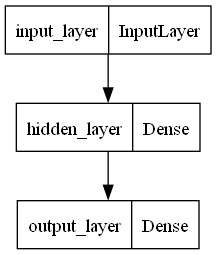

In [16]:
keras.utils.plot_model(model) 

**Weights (or Parameters)**

In [17]:
# Now lets look at the weights of each layer. 
#...We have 2 layers: 1 hidden dense layer, and the final output dense layer

len(model.weights) 

4

In [18]:
# these weights are stored as a list. [W1,B1,W2,B2]

# W1, B1 are used to compute hidden dense layer output 
# W2, B2 are used to compute final output Ypred

#lets see the shapes & values of each of these weights in the cells below

<img src="./images/weights.png" width="500"> 

**Lets look at each of the model layer we have defined above**

**Hidden layer (with 512 hidden Units)**

In [19]:
W1 = model.weights[0]
print (f'Shape of 1st set of weights W1 is: {W1.shape}')
# Shape of W1 (weights that are used to compute hidden dense layer (512 units) output 
#...using input pixels (784 pixels))


Shape of 1st set of weights W1 is: (784, 512)


In [20]:
B1 = model.weights[1]
print (f'Shape B1 is: {B1.shape}')
# Shape of B1 (Bias term used to compute hidden dense layer (512 units) output 
#...using input pixels (784 pixels))

Shape B1 is: (512,)


In [21]:
number_paramters_hiddenlayer = 784*512+512
print (f"Parameters used to calculate hidden layer output: {number_paramters_hiddenlayer}")

Parameters used to calculate hidden layer output: 401920


In [22]:
W1 # randomly initialized weights for W1

<tf.Variable 'hidden_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
array([[-0.04396496,  0.02883952, -0.06415268, ...,  0.05102568,
        -0.0499161 , -0.01585603],
       [ 0.02271894, -0.02996248, -0.06727785, ...,  0.00917599,
         0.02523789,  0.01911623],
       [ 0.0042187 ,  0.0150923 , -0.06771124, ...,  0.05676419,
         0.06125471, -0.044574  ],
       ...,
       [ 0.03151403,  0.01277095,  0.05599069, ..., -0.00991369,
        -0.05932115, -0.00486603],
       [-0.05813292,  0.00547113,  0.0649658 , ...,  0.00298259,
         0.05085603,  0.01976623],
       [ 0.01244407,  0.04208975,  0.00163489, ..., -0.05938166,
        -0.0281752 , -0.06342011]], dtype=float32)>

In [23]:
B1 # randomly initialized weights for B1

<tf.Variable 'hidden_layer/bias:0' shape=(512,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.,

**Final Output layer (with 10 units: Ypred)**

In [24]:
W2 = model.weights[2]
print (f'Shape of 1st set of weights W2 is: {W2.shape}')

# Shape of W2 (weights that are used to compute final output layer (10 units) from hidden units (512))

Shape of 1st set of weights W2 is: (512, 10)


In [25]:
B2 = model.weights[3]
print (f'Shape of B2 is: {B2.shape}')
# Shape of B2 (bias term used to compute final output layer (10 units) from hidden units (512))

Shape of B2 is: (10,)


In [26]:
number_paramters_l2 = 512*10+10
print (f"Parameters used to calculate final output layer: {number_paramters_l2}")

Parameters used to calculate final output layer: 5130


In [27]:
W2 # Randomly intialized weights for W2

<tf.Variable 'output_layer/kernel:0' shape=(512, 10) dtype=float32, numpy=
array([[ 0.10144415,  0.01401188, -0.09567635, ..., -0.07537238,
         0.03284854,  0.10084144],
       [ 0.04839655,  0.062588  , -0.0246714 , ..., -0.05991806,
        -0.02921262, -0.0195324 ],
       [-0.09804771, -0.05455118,  0.04508341, ...,  0.03604815,
        -0.02147697, -0.04802565],
       ...,
       [ 0.0639637 , -0.04840122, -0.01647158, ..., -0.0809636 ,
         0.03570101,  0.01957714],
       [-0.09009699,  0.09506776,  0.10449318, ..., -0.08751442,
        -0.01486642,  0.04280017],
       [ 0.08087457,  0.00895144, -0.0496891 , ..., -0.03436953,
        -0.10082413,  0.07267693]], dtype=float32)>

In [28]:
B2  # Randomly intialized weights for B2

<tf.Variable 'output_layer/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

### Lets train the model on the Fashion_MNIST dataset  but now with Functional API

**Load Data Set**

In [29]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
type(train_images)

numpy.ndarray

In [32]:
train_labels.shape

(60000,)

In [33]:
train_labels # train labels are represented as integers

# if we keep them as integers then we have to choose sparse_categorical_crossentropy loss
# if we convert them into one-hot vectors we have to choose categorical_cross_entropy loss

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**Preprocess Data**

In [34]:
#preprocess data
train_images = train_images.reshape((60000,28*28)).astype("float32")/255
test_images = test_images.reshape((10000,28*28)).astype("float32")/255

In [35]:
train_images.shape

(60000, 784)

In [36]:
# Convert labels to one-hot encoded vectors if needed and choose categorical_crossentropy loss

train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

In [37]:
train_labels[0:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

**Build the Neural Architecture with Functional API**

In [38]:
#Build the Neuralnetwork Architecture
# lets use a function that defines the model architecture. so that we can use it as often as we want.
def model_fashion_mnist():
    X = keras.Input(shape=(784,), name = "input") # Inputs: Again this is just a symbolic tensor. 
    A = keras.layers.Dense(512,activation="relu", name="hidden_layer")(X) # Hidden layer output
    Ypred = keras.layers.Dense(10,activation="softmax", name="output_layer")(A) # Final model prediction Ypred
    
    model = keras.Model(inputs=X,outputs = Ypred)
    return model

<img src="./images/DL-Intuition3.png" width="500"> 

In [39]:
model = model_fashion_mnist()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden_layer (Dense)        (None, 512)               401920    
                                                                 
 output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Compile the model**

In [40]:
#compile the model
model = model_fashion_mnist()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ["accuracy"])

# choose loss = categorical_crossentropy if labels are one-hot vectors
# choose loss = sparse_categorical_crossentropy if labels are integers

In [42]:
# optimizer, losses and metric above have been given as strings, 
# These strings are nothing but shortcuts which get converted to python objects 
#..can and be specified as shown below

model.compile(optimizer=keras.optimizers.RMSprop(), 
              loss=keras.losses.CategoricalCrossentropy(),
              metrics = [keras.metrics.CategoricalAccuracy()])

**Train the model on the training data**

In [43]:
#train the model
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

# in the above we are providing X (input),Y (targets or labels) into the fit method, 
#...by sperating training data into X & y.

# later we will see with some custom data generators and/or tensorflow based tf.data.Dataset object
#...we can pass just the training data direcctly without seperating into X & Y.

Epoch 1/5
469/469 [==============================] - 5s 6ms/step - loss: 0.5563 - categorical_accuracy: 0.8033
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.3842 - categorical_accuracy: 0.8583
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3379 - categorical_accuracy: 0.8762
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3124 - categorical_accuracy: 0.8838
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2937 - categorical_accuracy: 0.8927


### We can enhance the capabilities for training the model in keras in many ways

**Train the model by providing validation data as well**

In [45]:
# Get the model architecture and compile
#--------------------------------------------------------------------------------
model = model_fashion_mnist()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ["accuracy"])
#----------------------------------------------------------------------------------------------------

# split original training data (60k examples) into 2 parts: training data (50k) and validation data (10k)
model_hist = model.fit(train_images, train_labels, validation_split=0.1, epochs = 10, batch_size = 128)

Epoch 1/10
422/422 [==============================] - 3s 7ms/step - loss: 0.5741 - accuracy: 0.7974 - val_loss: 0.4097 - val_accuracy: 0.8482
Epoch 2/10
422/422 [==============================] - 2s 6ms/step - loss: 0.3868 - accuracy: 0.8596 - val_loss: 0.3544 - val_accuracy: 0.8700
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.3403 - accuracy: 0.8748 - val_loss: 0.3653 - val_accuracy: 0.8677
Epoch 4/10
422/422 [==============================] - 2s 6ms/step - loss: 0.3124 - accuracy: 0.8843 - val_loss: 0.3446 - val_accuracy: 0.8735
Epoch 5/10
422/422 [==============================] - 3s 6ms/step - loss: 0.2940 - accuracy: 0.8912 - val_loss: 0.3417 - val_accuracy: 0.8785
Epoch 6/10
422/422 [==============================] - 2s 6ms/step - loss: 0.2770 - accuracy: 0.8978 - val_loss: 0.3563 - val_accuracy: 0.8805
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - loss: 0.2645 - accuracy: 0.9024 - val_loss: 0.3583 - val_accuracy: 0.8768
Epoch 

**Call Backs**

In [47]:
# Get the model architecture and compile
#--------------------------------------------------------------------------------
model = model_fashion_mnist()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ["accuracy"])
#----------------------------------------------------------------------------------------------------

# Call backs are objects that are passed to the fit method to have a better control on the training process
# we can use callbacks for...
# 1. Early stopping the model if the validation loss is not improving
# 2. Dynamically adjust the values of certain parameters during training
# 3. Save the model at different checkpints during training

callback_list = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=2), 
                  keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2),
                  keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='checkpoint_best.keras',save_best_only=True)]

model_hist = model.fit(train_images, train_labels, validation_split=0.1, epochs = 10, callbacks = callback_list, batch_size = 128)

Epoch 1/10
422/422 [==============================] - 4s 8ms/step - loss: 0.5733 - accuracy: 0.7962 - val_loss: 0.4124 - val_accuracy: 0.8450 - lr: 0.0010
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.3874 - accuracy: 0.8574 - val_loss: 0.3754 - val_accuracy: 0.8647 - lr: 0.0010
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.3407 - accuracy: 0.8759 - val_loss: 0.3711 - val_accuracy: 0.8655 - lr: 0.0010
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.3132 - accuracy: 0.8830 - val_loss: 0.3390 - val_accuracy: 0.8785 - lr: 0.0010
Epoch 5/10
422/422 [==============================] - 3s 6ms/step - loss: 0.2940 - accuracy: 0.8916 - val_loss: 0.3442 - val_accuracy: 0.8703 - lr: 0.0010
Epoch 6/10
422/422 [==============================] - 3s 6ms/step - loss: 0.2777 - accuracy: 0.8986 - val_loss: 0.3329 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - lo

In [48]:
#you can load a previously checkpointed model like this and either continue training, or use it to evalute or make predictions
model = keras.models.load_model("checkpoint_best.keras")